<a href="https://colab.research.google.com/github/mohankrishna9581/sinex/blob/main/sine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train on 600 samples, validate on 200 samples
Epoch 1/600
600/600 [==============================] - 0s 375us/sample - loss: 2.7239 - mae: 1.2051 - val_loss: 1.4306 - val_mae: 0.8887
Epoch 2/600
600/600 [==============================] - 0s 82us/sample - loss: 1.0300 - mae: 0.8052 - val_loss: 0.6717 - val_mae: 0.6837
Epoch 3/600
600/600 [==============================] - 0s 89us/sample - loss: 0.5565 - mae: 0.6425 - val_loss: 0.4520 - val_mae: 0.5669
Epoch 4/600
600/600 [==============================] - 0s 88us/sample - loss: 0.4289 - mae: 0.5634 - val_loss: 0.3911 - val_mae: 0.5224
Epoch 5/600
600/600 [==============================] - 0s 91us/sample - loss: 0.3849 - mae: 0.5288 - val_loss: 0.3592 - val_mae: 0.5044
Epoch 6/600
600/600 [==============================] - 0s 96us/sample - loss: 0.3595 - mae: 0.5147 - val_loss: 0.3551 - val_mae: 0.4933
Epoch 7/600
600/600 [==============================] - 0s 101us/sample - loss: 0.3332 - mae: 0.4935 - val_loss: 0.3099 - val_mae: 0.4674


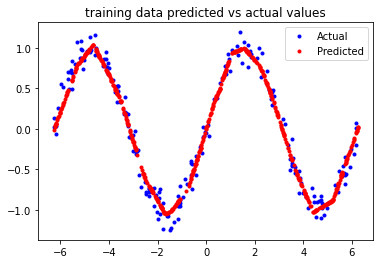

In [ ]:
#Toy Problem Y=sin(x) 1000 samples of period -2pi to 2pi
!pip install tensorflow==2.0.0-beta0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
SAMPLES = 1000                                                                   # No.of samples
SEED = 1400                                                                                                     
np.random.seed(SEED)
tf.random.set_seed(SEED)
x_values = np.random.uniform(low=-(2*math.pi), high=2*math.pi,size=SAMPLES)      # x values selected uniformly in the range of -2pi to 2pi
np.random.shuffle(x_values)                                                                                   
y_values = np.sin(x_values)                                                      # y = sin(x)
plt.plot(x_values,y_values, 'b.')                                                # plotting x,y values
#plt.show()
y_values += 0.1*np.random.randn(*y_values.shape)                                 # adding some random noise tol sine plot
plt.plot(x_values, y_values, 'b.')                                               # plotting noisy data 
#plt.show()
TRAIN_SPLIT = int(0.6 * SAMPLES)                                                 # splitting training data from samples
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)                                    # splitting test data from samples
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])      
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])      
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES                 # asserting samples to train, validate and test
plt.plot(x_train, y_train, 'b.', label="Train")                                  # plotting train graph
plt.plot(x_validate, y_validate, 'y.', label="Validate")                         # plotting validate graph
plt.plot(x_test, y_test, 'r.', label="Test")                                     # plotting test graph 
plt.legend()                                                                     # plotting three graphs on one plot
#plt.show()
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()                                                   
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model_1.add(layers.Dense(16, activation='relu'))
model_1.add(layers.Dense(1))
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
#model_1.summary()
history_1 = model_1.fit(x_train, y_train, epochs=600, batch_size=16, validation_data=(x_validate, y_validate))
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
SKIP = 200
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
predictions = model_1.predict(x_train)
plt.clf()
plt.title('training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

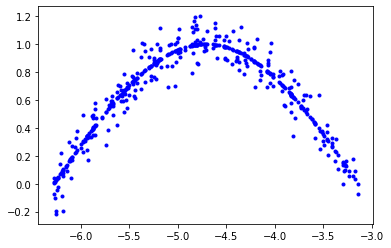

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_58 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Train on 150 samples, validate on 50 samples
Epoch 1/600
150/150 [==============================] - 0s 1ms/sample - loss: 2.3506 - mae: 1.4582 - val_loss: 0.9299 - val_mae: 0.9019
Epoch 2/600
150/150 [==============================] - 0s 131us/sample - loss: 0.5463 - mae: 0.6555 - val_loss: 0.2627 - val_mae: 0.4567
Epoch 3/600
150/150 [==============================] - 0s 127us/samp

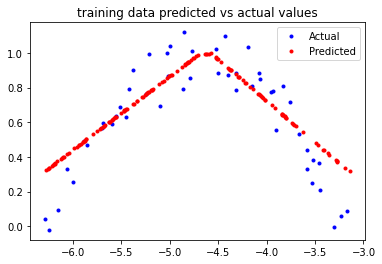

In [ ]:
#Toy Problem Y=sin(x) for 250 samples of period -2pi to -pi
!pip install tensorflow==2.0.0-beta0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
SAMPLES = 250
SEED = 1400
np.random.seed(SEED)
tf.random.set_seed(SEED)
x_values = np.random.uniform(low=-(2*math.pi), high=-(math.pi),size=SAMPLES)
np.random.shuffle(x_values)
y_values = np.sin(x_values)
plt.plot(x_values,y_values, 'b.')
#plt.show()
y_values += 0.1*np.random.randn(*y_values.shape)
plt.plot(x_values, y_values, 'b.')
plt.show()
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
#plt.show()
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model_2 = tf.keras.Sequential()
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1))
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model_2.summary()
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16, validation_data=(x_validate, y_validate))
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
SKIP = 200
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
predictions = model_2.predict(x_train)
plt.clf()
plt.title('training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

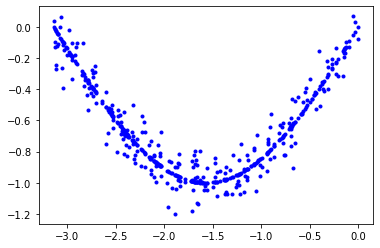

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_55 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Train on 150 samples, validate on 50 samples
Epoch 1/600
150/150 [==============================] - 0s 1ms/sample - loss: 0.2004 - mae: 0.3908 - val_loss: 0.1661 - val_mae: 0.3400
Epoch 2/600
150/150 [==============================] - 0s 133us/sample - loss: 0.1884 - mae: 0.3711 - val_loss: 0.1522 - val_mae: 0.3284
Epoch 3/600
150/150 [==============================] - 0s 113us/samp

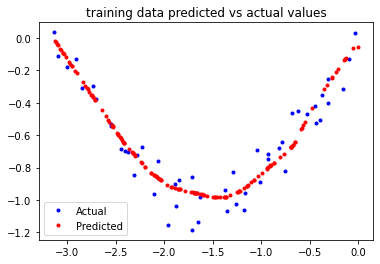

In [ ]:
#Toy Problem Y=sin(x) for 250 samples period of -pi to 0
!pip install tensorflow==2.0.0-beta0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
SAMPLES = 250
SEED = 1400
np.random.seed(SEED)
tf.random.set_seed(SEED)
x_values = np.random.uniform(low=-(math.pi), high=0,size=SAMPLES)
np.random.shuffle(x_values)
y_values = np.sin(x_values)
plt.plot(x_values,y_values, 'b.')
#plt.show()
y_values += 0.1*np.random.randn(*y_values.shape)
plt.plot(x_values, y_values, 'b.')
plt.show()
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
#plt.show()
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model_2 = tf.keras.Sequential()
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1))
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model_2.summary()
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16, validation_data=(x_validate, y_validate))
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
SKIP = 200
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
predictions = model_2.predict(x_train)
plt.clf()
plt.title('training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

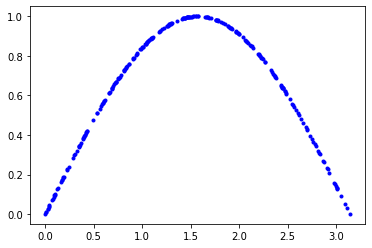

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_52 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Train on 150 samples, validate on 50 samples
Epoch 1/600
150/150 [==============================] - 0s 1ms/sample - loss: 0.4463 - mae: 0.4357 - val_loss: 0.3047 - val_mae: 0.4034
Epoch 2/600
150/150 [==============================] - 0s 129us/sample - loss: 0.3034 - mae: 0.4056 - val_loss: 0.2455 - val_mae: 0.3965
Epoch 3/600
150/150 [==============================] - 0s 121us/samp

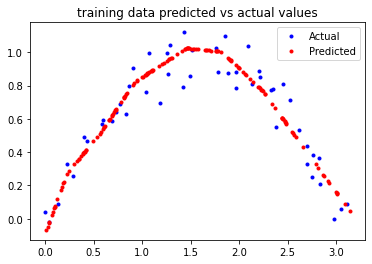

In [ ]:
#Toy Problem Y=sin(x) 250 samples of period 0 to pi
!pip install tensorflow==2.0.0-beta0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
SAMPLES = 250
SEED = 1400
np.random.seed(SEED)
tf.random.set_seed(SEED)
x_values = np.random.uniform(low=0, high=math.pi,size=SAMPLES)
np.random.shuffle(x_values)
y_values = np.sin(x_values)
plt.plot(x_values,y_values, 'b.')
plt.show()
y_values += 0.1*np.random.randn(*y_values.shape)
plt.plot(x_values, y_values, 'b.')
#plt.show()
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
#plt.show()
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model_2 = tf.keras.Sequential()
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1))
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model_2.summary()
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16, validation_data=(x_validate, y_validate))
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
SKIP = 200
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
predictions = model_2.predict(x_train)
plt.clf()
plt.title('training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

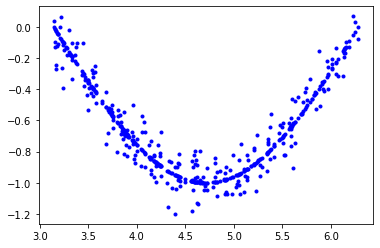

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_49 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Train on 150 samples, validate on 50 samples
Epoch 1/600
150/150 [==============================] - 0s 1ms/sample - loss: 13.7157 - mae: 3.6295 - val_loss: 10.8549 - val_mae: 3.2379
Epoch 2/600
150/150 [==============================] - 0s 112us/sample - loss: 9.4674 - mae: 3.0141 - val_loss: 7.9096 - val_mae: 2.7606
Epoch 3/600
150/150 [==============================] - 0s 123us/sa

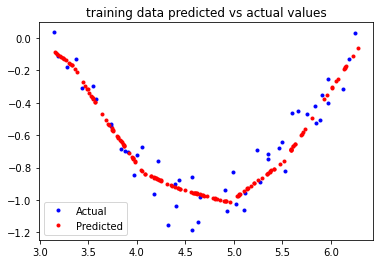

In [ ]:
#Toy Problem Y=sin(x) 250 samples of period pi to 2pi
!pip install tensorflow==2.0.0-beta0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
SAMPLES = 250
SEED = 1400
np.random.seed(SEED)
tf.random.set_seed(SEED)
x_values = np.random.uniform(low=math.pi, high=2*math.pi,size=SAMPLES)
np.random.shuffle(x_values)
y_values = np.sin(x_values)
plt.plot(x_values,y_values, 'b.')
#plt.show()
y_values += 0.1*np.random.randn(*y_values.shape)
plt.plot(x_values, y_values, 'b.')
plt.show()
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
#plt.show()
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model_2 = tf.keras.Sequential()
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1))
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model_2.summary()
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16, validation_data=(x_validate, y_validate))
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
SKIP = 200
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
predictions = model_2.predict(x_train)
plt.clf()
plt.title('training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

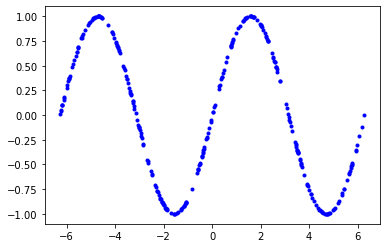

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_76 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Train on 180 samples, validate on 60 samples
Epoch 1/600
180/180 [==============================] - 0s 1ms/sample - loss: 3.2646 - mae: 1.3041 - val_loss: 3.6890 - val_mae: 1.4154
Epoch 2/600
180/180 [==============================] - 0s 139us/sample - loss: 2.1031 - mae: 1.0289 - val_loss: 2.5623 - val_mae: 1.1485
Epoch 3/600
180/180 [==============================] - 0s 132us/samp

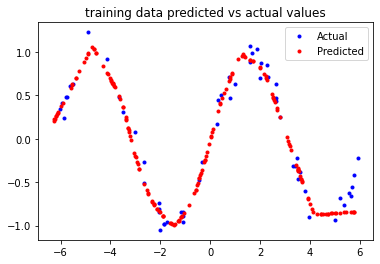

In [ ]:
#Toy Problem Y=sin(x) 300 samples of period -2pi to 2pi
!pip install tensorflow==2.0.0-beta0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
SAMPLES = 300
SEED = 1400
np.random.seed(SEED)
tf.random.set_seed(SEED)
x1_values = np.random.uniform(low=-(2*math.pi), high=2*math.pi,size=SAMPLES)
np.random.shuffle(x1_values)
y1_values = np.sin(x1_values)
plt.plot(x1_values,y1_values, 'b.')
plt.show()
y1_values += 0.1*np.random.randn(*y1_values.shape)
plt.plot(x1_values, y1_values, 'b.')
#plt.show()
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
x1_train, x1_validate, x1_test = np.split(x1_values, [TRAIN_SPLIT, TEST_SPLIT])
y1_train, y1_validate, y1_test = np.split(y1_values, [TRAIN_SPLIT, TEST_SPLIT])
assert (x1_train.size + x1_validate.size + x1_test.size) == SAMPLES
plt.plot(x1_train, y1_train, 'b.', label="Train")
plt.plot(x1_validate, y1_validate, 'y.', label="Validate")
plt.plot(x1_test, y1_test, 'r.', label="Test")
plt.legend()
#plt.show()
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model_2 = tf.keras.Sequential()
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1))
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model_2.summary()
history_2 = model_2.fit(x1_train, y1_train, epochs=600, batch_size=16, validation_data=(x1_validate, y1_validate))
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
SKIP = 200
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
predictions1 = model_2.predict(x1_train)
plt.clf()
plt.title('training data predicted vs actual values')
plt.plot(x1_test, y1_test, 'b.', label='Actual')
plt.plot(x1_train, predictions1, 'r.', label='Predicted')
plt.legend()
plt.show()

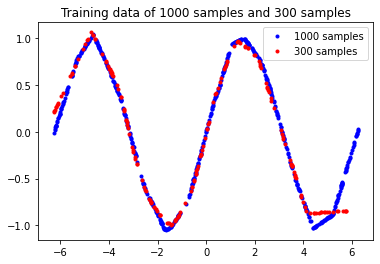

In [ ]:
#Toy problem y=sin(x) training data of 1000 samples and 300 samples
predictions1 = model_2.predict(x1_train)
predictions = model_1.predict(x_train)
plt.clf()
plt.title('Training data of 1000 samples and 300 samples')
plt.plot(x_train, predictions, 'b.', label='1000 samples')
plt.plot(x1_train, predictions1, 'r.', label='300 samples')
plt.legend()
plt.show()

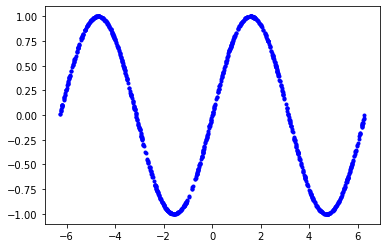

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_61 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Train on 600 samples, validate on 200 samples
Epoch 1/600
600/600 [==============================] - 1s 1ms/sample - loss: 0.8907 - mae: 0.7065 - val_loss: 0.3539 - val_mae: 0.5018
Epoch 2/600
600/600 [==============================] - 1s 1ms/sample - loss: 0.3106 - mae: 0.4754 - val_loss: 0.3458 - val_mae: 0.4863
Epoch 3/600
600/600 [==============================] - 1s 1ms/sample 

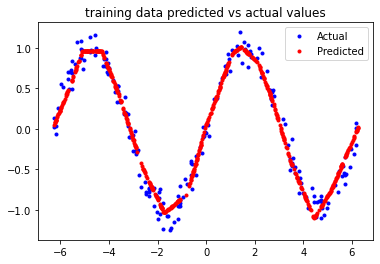

In [ ]:
#Toy Problem Y=sin(x) 1000 samples of period -2pi to 2pi with batch size of 1
!pip install tensorflow==2.0.0-beta0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
SAMPLES = 1000
SEED = 1400
np.random.seed(SEED)
tf.random.set_seed(SEED)
x_values = np.random.uniform(low=-(2*math.pi), high=2*math.pi,size=SAMPLES)
np.random.shuffle(x_values)
y_values = np.sin(x_values)
plt.plot(x_values,y_values, 'b.')
plt.show()
y_values += 0.1*np.random.randn(*y_values.shape)
plt.plot(x_values, y_values, 'b.')
#plt.show()
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
#plt.show()
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model_1.add(layers.Dense(16, activation='relu'))
model_1.add(layers.Dense(1))
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model_1.summary()
history_1 = model_1.fit(x_train, y_train, epochs=600, batch_size=1, validation_data=(x_validate, y_validate))
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
SKIP = 200
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
predictions = model_1.predict(x_train)
plt.clf()
plt.title('training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

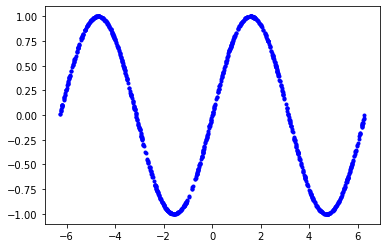

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_64 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Train on 600 samples, validate on 200 samples
Epoch 1/600
600/600 [==============================] - 0s 304us/sample - loss: 5.3057 - mae: 1.7068 - val_loss: 4.2714 - val_mae: 1.5084
Epoch 2/600
600/600 [==============================] - 0s 18us/sample - loss: 4.2486 - mae: 1.5176 - val_loss: 3.6644 - val_mae: 1.3873
Epoch 3/600
600/600 [==============================] - 0s 17us/sam

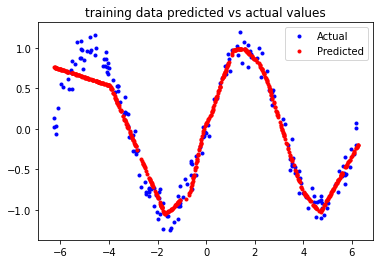

In [ ]:
#Toy Problem Y=sin(x) 1000 samples of period -2pi to 2pi with batch size of 256
!pip install tensorflow==2.0.0-beta0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
SAMPLES = 1000
SEED = 1400
np.random.seed(SEED)
tf.random.set_seed(SEED)
x_values = np.random.uniform(low=-(2*math.pi), high=2*math.pi,size=SAMPLES)
np.random.shuffle(x_values)
y_values = np.sin(x_values)
plt.plot(x_values,y_values, 'b.')
plt.show()
y_values += 0.1*np.random.randn(*y_values.shape)
plt.plot(x_values, y_values, 'b.')
#plt.show()
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
#plt.show()
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model_1.add(layers.Dense(16, activation='relu'))
model_1.add(layers.Dense(1))
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model_1.summary()
history_1 = model_1.fit(x_train, y_train, epochs=600, batch_size=256, validation_data=(x_validate, y_validate))
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
SKIP = 200
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
predictions = model_1.predict(x_train)
plt.clf()
plt.title('training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()